<!-- ID attribute for the table of contents -->
# Capstone: Retail Analyst 


## Introduction

In this project, I will be working as a retail analyst for an online retailer. The aim of this project is to analyze some of the key metrics related to the retail business, such as sales trends, customer behavior, product performance, customer segmentation, competitive analysis, customer experience, and inventory management. The ultimate goals of this project are to refine the product offering, increase order size, plan product assortments, forecast sales, and optimize e-commerce strategies. Through this analysis, we hope to provide valuable insights that can help the retailer make data-driven decisions to improve their business performance.

With the given dataset, we can perform various analyses and extract valuable insights to help improve your ecommerce store's performance. Here are some key analyses we will conduct:

#### 1. Sales Performance Analysis:

- Calculate total revenue, average revenue per order, and revenue by product
- Identify top-selling products and categories based on revenue and quantity sold
- Provide insights and recommendations based on the findings.

#### 2. Pricing & Profitability Analysis:

- Evaluate the impact of price changes on sales volume
- Calculate profit margins for each product using Quantity and UnitPrice
- Identify high-margin and low-margin products

#### 3. Customer Segmentation:

- Group customers by their purchase patterns, frequency, and monetary value
- Create customer profiles to better understand their demographics and preferences
- Develop targeted marketing strategies for each customer segment

#### 4. Geographic Analysis:

- Analyze sales performance by country
- Identify high-potential markets for expansion
- Customize marketing strategies based on regional preferences

#### 5. Time-Based Analysis:

- Determine peak shopping hours and days
- Optimize promotional campaigns and staffing based on peak shopping periods
- Analyze the impact of holidays and special events on sales

#### 6. Inventory Analysis:

- Analyze product stock levels and turnover rates
- Identify slow-moving or overstocked items
- Optimize inventory management to reduce carrying costs and stockouts

#### 7. Customer Retention Analysis:

- Calculate customer churn rate and average customer lifetime value
- Identify factors contributing to customer attrition
- Develop strategies to improve customer loyalty and retention

#### 8. Market Basket Analysis:
- Market basket analysis is a type of analysis used to understand the purchase behavior of customers. It's based on the concept that if you buy a certain group of items, you are more (or less) likely to buy another group of items.

To perform these analyses, I will first clean and preprocess the dataset, addressing any missing or incorrect data. Then, I will utilize various analytical tools and techniques such as descriptive statistics, clustering, and time series analysis to uncover valuable insights and make data-driven recommendations for your e-commerce store.

<a id="top"></a>

## Table of Contents:

[Data Dictionary](#Data-Dictionary)

[Exploratory Data Analysis](#EDA)

1. [Sales Performance Analysis](#Sales-Performance-Analysis)
2. [Pricing & Profitability Analysis](#Pricing-Profitability-Analysis)
3. [Customer Segmentation](#Customer-Segmentation)
4. [Geographic Analysis](#Geographic-Analysis)
5. [Time-Based Analysis](#Time-Based-Analysis)
6. [Inventory Analysis](#Inventory-Analysis)
7. [Customer Retention Analysis](#Customer-Retention-Analysis)
8. [Market Basket Analysis](#MBA)

[Conclusion](#EDA)


In [27]:
# Import necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy import sparse
from math import ceil
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import os
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules


import warnings
warnings.filterwarnings('ignore')

## Data Dictionary 


| Column | Information |
| :- |  :- | 
| InvoiceNo | *Invoice Number* |
| StockCode | *Product Stock Code* |
| Description | *Product Description* |
| Quantity | *Product Quantity* |
| InvoiceDate | *Invoice Date* |
| UnitPrice | *Product Unit Price* |
| CustomerID | *Customer ID* |
| Country | *Origin of order* |

<a id="EDA"></a>
## Exploration & Cleaning

To perform these analyses, I will first clean and preprocess the dataset, addressing any missing or incorrect data. Then, I will utilize various analytical tools and techniques such as descriptive statistics, clustering, and time series analysis to uncover valuable insights and make data-driven recommendations for your e-commerce store.

In [2]:
# Load the data set
data = pd.read_csv('downloads/online_retail.csv')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data.loc[data['InvoiceDate'] <= '2011-12-01']

The data set had 1 full year plus 9 days, I decided to remove the extra days to make the data more cohesive.

In [3]:
# Let's have a look at the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The data set had 1 full year plus 9 days, I decided to remove the extra days to make the data more cohesive.

In [4]:
# print the shape of the dataset
print('Shape of data Set: ', data.shape)

Shape of data Set:  (516384, 8)


In [5]:
# Another way to look at the shape
print("Data Set")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")
print(f"Missing data: {data.isna().sum().sum()}")

Data Set
Rows: 516384
Columns: 8
Missing data: 128655


In [6]:
# Missing data detail
print(f"Missing data: {data.isna().sum()}")

Missing data: InvoiceNo           0
StockCode           0
Description      1439
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     127216
Country             0
dtype: int64


In [7]:
# Looking at the info in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    516384 non-null  object        
 1   StockCode    516384 non-null  object        
 2   Description  514945 non-null  object        
 3   Quantity     516384 non-null  int64         
 4   InvoiceDate  516384 non-null  datetime64[ns]
 5   UnitPrice    516384 non-null  float64       
 6   CustomerID   389168 non-null  float64       
 7   Country      516384 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.5+ MB


In [8]:
# replace missing customer IDs with dummy ID
# I decided to do this as I did not want to lose 135,000 rows of data as the mix of sales might be affected. 
data['CustomerID'].fillna(9999900000, inplace=True)

In [9]:
# drop all rows that contain missing values
# We have some missing values in the Description column, it's only affecting about 500 rows of data, so i decided to drop.
data.dropna(inplace=True)

In [10]:
# Looking at the info in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514945 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    514945 non-null  object        
 1   StockCode    514945 non-null  object        
 2   Description  514945 non-null  object        
 3   Quantity     514945 non-null  int64         
 4   InvoiceDate  514945 non-null  datetime64[ns]
 5   UnitPrice    514945 non-null  float64       
 6   CustomerID   514945 non-null  float64       
 7   Country      514945 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


In [11]:
# Lerts look at the distribution of the the numarical columns
data.describe()

,Quantity,UnitPrice,CustomerID
count,514945.000000,514945.000000,5.149450e+05
mean,9.639181,4.592507,2.442520e+09
std,156.012201,94.419034,4.296390e+09
min,-74215.000000,-11062.060000,1.234600e+04
25%,1.000000,1.250000,1.435700e+04
50%,3.000000,2.080000,1.622200e+04
75%,10.000000,4.130000,1.822600e+04
max,74215.000000,38970.000000,9.999900e+09


Looks like we have some negative values in `Quantity` and `UnitPrice`, let's go ahead and drop all these

In [12]:
# drop rows with negative values in Quantity and UnitPrice columns
data = data.drop(data[data['Quantity'] < 0].index)
data = data.drop(data[data['UnitPrice'] < 1].index)
# We're going to remove any item priced less than $1 ($0-$.99 removed)

In [13]:
# let's have a look at the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,2.10,15311.0,United Kingdom
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
111,536381,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,24,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
112,536381,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,24,2010-12-01 09:41:00,1.25,15311.0,United Kingdom


In [14]:
# Filter out rows containing 'postage' or 'dotcom postage' in the description
data = data[~data['Description'].str.contains('POSTAGE|DOTCOM POSTAGE', case=False)]

<a id="Sales-Performance-Analysis"></a>
## 1. Sales Performance Analysis

We will calculate the total revenue using some feature engineering by multiplying the `Quantity` and `UnitPrice` columns, and then add a new `Revenue` column to the DataFrame:

In [15]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']

Calculate total revenue, average revenue per order, and revenue by product:

In [16]:
# Total revenue
total_revenue = data['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")

# Average revenue per order
average_revenue_per_order = data.groupby('InvoiceNo')['Revenue'].sum().mean()
print(f"Average Revenue per Order: {average_revenue_per_order}")

# Revenue by product
product_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by Product:\n", product_revenue) 


Total Revenue: 8712156.209999999
Average Revenue per Order: 466.6143329227144
Revenue by Product:
 Description
REGENCY CAKESTAND 3 TIER              168477.87
WHITE HANGING HEART T-LIGHT HOLDER    104085.75
PARTY BUNTING                          98585.85
JUMBO BAG RED RETROSPOT                92113.15
MEDIUM CERAMIC TOP STORAGE JAR         81448.21
                                        ...    
LETTER "B" BLING KEY RING                  1.25
WIRE FLOWER T-LIGHT HOLDER                 1.25
DUSTY PINK CHRISTMAS TREE 30CM             1.25
S/4 ICON COASTER,ELVIS LIVES               1.25
DECORATION SITTING BUNNY                   1.21
Name: Revenue, Length: 3633, dtype: float64


#### I wanted a better way to look at this data, and possibly see how long the product tail is. The below code shows this well.

In [17]:
# Total revenue
total_revenue = data['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Average revenue per order
average_revenue_per_order = data.groupby('InvoiceNo')['Revenue'].sum().mean()
print(f"Average Revenue per Order: ${average_revenue_per_order:.2f}")

# Revenue by product
product_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by Product:")
print("| Description                           | Revenue     |")
print("|---------------------------------------|-------------|")
for description, revenue in product_revenue.items():
    print(f"| {description:<38} | ${revenue:,.2f} |")


Total Revenue: $8,712,156.21
Average Revenue per Order: $466.61
Revenue by Product:
| Description                           | Revenue     |
|---------------------------------------|-------------|
| REGENCY CAKESTAND 3 TIER               | $168,477.87 |
| WHITE HANGING HEART T-LIGHT HOLDER     | $104,085.75 |
| PARTY BUNTING                          | $98,585.85 |
| JUMBO BAG RED RETROSPOT                | $92,113.15 |
| MEDIUM CERAMIC TOP STORAGE JAR         | $81,448.21 |
| Manual                                 | $76,406.20 |
| PAPER CHAIN KIT 50'S CHRISTMAS         | $58,081.58 |
| RABBIT NIGHT LIGHT                     | $57,321.97 |
| ASSORTED COLOUR BIRD ORNAMENT          | $56,932.19 |
| CHILLI LIGHTS                          | $51,478.02 |
| SPOTTY BUNTING                         | $41,783.27 |
| JUMBO BAG PINK POLKADOT                | $41,509.92 |
| PICNIC BASKET WICKER 60 PIECES         | $39,619.50 |
| SET OF 3 CAKE TINS PANTRY DESIGN       | $37,070.24 |
| DOORMAT KEEP CAL

#### There is a long product tail. Let's see how many products we have under $1,000 in annual revenue

In [18]:
# Total number of products
total_products = len(product_revenue)
formatted_total_products = "{:,}".format(total_products)
print(f"Total Number of Products: {formatted_total_products}")

# Count of products with less than $1000 in annual revenue
low_revenue_products_count = (product_revenue < 1000).sum()
formatted_low_revenue_count = "{:,}".format(low_revenue_products_count)
print(f"Products with less than $1000 in Annual Revenue: {formatted_low_revenue_count}")


Total Number of Products: 3,633
Products with less than $1000 in Annual Revenue: 2,314


#### Further analysis needs to be done on this tail. Some general recommendations for a long product tail is:

When dealing with products that have low annual sales or form a long tail in your online sales data, there are several creative approaches you can consider to address them:

#### Bundle or package them: 
- Combine low-selling products into bundles or packages to create more appealing offerings. This can help increase their perceived value and attract customers who may be interested in multiple items.

#### Promotions and discounts: 
- Offer special promotions, discounts, or limited-time offers specifically for the low-selling products. This can generate interest and encourage customers to give them a try.

#### Cross-selling and upselling: 
- Promote the low-selling products as complementary items to more popular or higher-margin products. Cross-selling and upselling techniques can help increase the visibility and sales of these products.

#### Target niche markets: 
- Identify niche markets or specific customer segments that may have a higher interest in the low-selling products. Tailor your marketing efforts to reach those audiences through targeted advertising or partnerships.

#### Enhance product descriptions and visuals: 
- Improve the product descriptions, images, and other visuals to make the low-selling products more appealing and engaging. Highlight unique features, benefits, or potential use cases that might resonate with customers.

#### Collaborate with influencers or affiliates: 
- Partner with influencers or affiliates in your industry who can promote the low-selling products to their audience. Their endorsement or recommendation can help generate awareness and boost sales.

#### Explore new sales channels: 
- Consider expanding your sales channels to reach a broader customer base. Explore options such as online marketplaces, social media platforms, or niche-specific platforms where your low-selling products might find a more receptive audience.

#### Customer feedback and reviews: 
- Encourage customers to provide feedback and reviews for the low-selling products. Positive reviews can increase credibility and attract new customers. Address any negative feedback constructively to improve the products and customer satisfaction.

#### Product positioning or rebranding: 
- Evaluate the positioning and branding of the low-selling products. It might be necessary to reposition or rebrand them to better align with customer needs, trends, or preferences. This can help create a fresh perspective and increase their appeal.

#### Product improvements or variations: 
- Assess if there are any improvements or variations you can make to the low-selling products based on customer feedback or market trends. This could involve tweaking features, introducing new sizes or colors, or enhancing functionality to better meet customer demands.

It's essential to track the results of any initiatives you implement and adjust your strategies accordingly. The goal is to find the most effective approaches for addressing low-selling products and maximizing their sales potential, or eliminate them altogether.

Identify top-selling products and categories based on revenue and quantity sold

In [19]:
# Top 10 products by quantity sold
top_10_products_by_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:\n", top_10_products_by_quantity)


Top 10 Products by Quantity Sold:
 Description
MEDIUM CERAMIC TOP STORAGE JAR        77826
JUMBO BAG RED RETROSPOT               47369
WHITE HANGING HEART T-LIGHT HOLDER    37113
ASSORTED COLOUR BIRD ORNAMENT         35131
RABBIT NIGHT LIGHT                    26477
VICTORIAN GLASS HANGING T-LIGHT       21202
JUMBO BAG PINK POLKADOT               21006
RED  HARMONICA IN BOX                 20775
LUNCH BAG RED RETROSPOT               18956
PARTY BUNTING                         18159
Name: Quantity, dtype: int64


Looked up some code snippets to show this in an easy to read table

In [20]:
# Top 10 products by quantity sold
top_10_products_by_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print("| Rank | Description                           | Quantity    | Revenue      |")
print("|------|---------------------------------------|-------------|--------------|")
for rank, (description, quantity) in enumerate(top_10_products_by_quantity.iteritems(), start=1):
    revenue = product_revenue[description]
    formatted_revenue = "${:,.2f}".format(revenue)
    print(f"| {rank:<4} | {description:<38} | {quantity:<11} | {formatted_revenue:<12} |")


Top 10 Products by Quantity Sold:
| Rank | Description                           | Quantity    | Revenue      |
|------|---------------------------------------|-------------|--------------|
| 1    | MEDIUM CERAMIC TOP STORAGE JAR         | 77826       | $81,448.21   |
| 2    | JUMBO BAG RED RETROSPOT                | 47369       | $92,113.15   |
| 3    | WHITE HANGING HEART T-LIGHT HOLDER     | 37113       | $104,085.75  |
| 4    | ASSORTED COLOUR BIRD ORNAMENT          | 35131       | $56,932.19   |
| 5    | RABBIT NIGHT LIGHT                     | 26477       | $57,321.97   |
| 6    | VICTORIAN GLASS HANGING T-LIGHT        | 21202       | $29,402.51   |
| 7    | JUMBO BAG PINK POLKADOT                | 21006       | $41,509.92   |
| 8    | RED  HARMONICA IN BOX                  | 20775       | $25,106.60   |
| 9    | LUNCH BAG RED RETROSPOT                | 18956       | $34,975.66   |
| 10   | PARTY BUNTING                          | 18159       | $98,585.85   |


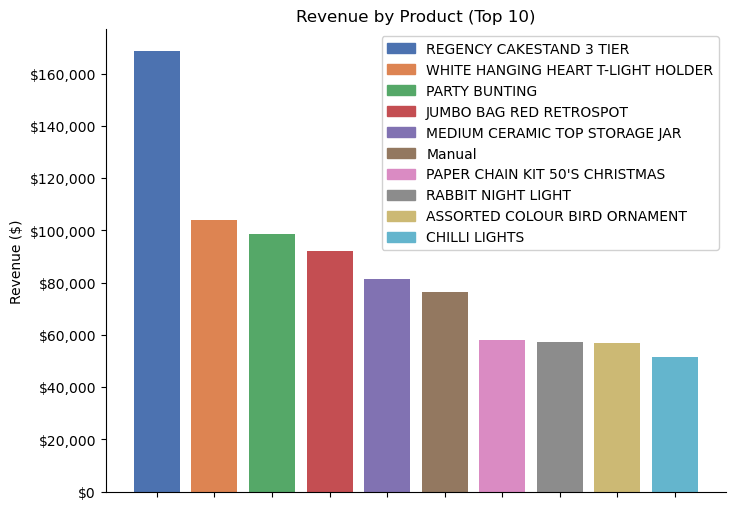

In [24]:
# Define colorblind-friendly color palette
palette = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD']

# Revenue by product (limited to top 10 products)
product_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)[:10]

# Create bar chart with colorblind-friendly colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(product_revenue.index, product_revenue.values, color=palette)
ax.set_xticklabels([])  # remove x-axis labels
ax.set_xlabel('')
ax.set_ylabel('Revenue ($)')
ax.set_title('Revenue by Product (Top 10)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Format y-axis labels with dollar signs
def currency(x, pos):
    """The two args are the value and tick position"""
    return "${:,.0f}".format(x)
ax.yaxis.set_major_formatter(plt.FuncFormatter(currency))

# Create legend
handles = [plt.Rectangle((0,0),1,1, color=palette[i]) for i in range(len(product_revenue))]
ax.legend(handles, product_revenue.index, loc='upper right', framealpha=0.9)

# Save to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'revenue_by_product (Top 10)_bar_colored.png')
plt.savefig(save_path, bbox_inches='tight')

# Show figure
plt.show()


---------

<a id="Pricing-Profitability-Analysis"></a>
## 2. Pricing & Profitability Analysis

### Profitability Analysis
#### We are unable to preform a profitibility analysis, as we do not have the product cost, we only have the `UnitPrice` & `Revenue`. Here are some potential insights that can be derived from this kind of analysis: 

#### Overall Profitability: 
- This is the most direct insight. By comparing revenue to expenses, you can understand if your online store is currently profitable, and how profitability may have changed over time.
#### Product Profitability: 
- Profitability analysis often includes a breakdown by product or product category. This can show which items are the most profitable and which are the least. You might find that a small subset of your products are responsible for a large portion of your profit. We can focus on driving sales by using those products for suggsted addons.
#### Customer Profitability: 
- Similar to product profitability, you can also analyze profitability by customer. This might involve segmenting customers by characteristics like location, purchase frequency, or average order size.
#### Marketing ROI: 
- If you're spending money on marketing and advertising, profitability analysis can help determine the return on investment (ROI) for these activities. For example, you might find that certain marketing channels drive sales of more profitable products vs others.
#### Pricing Strategy: 
- If your analysis shows low profitability despite high sales volumes, it might indicate a need to revisit your pricing strategy. Alternatively, if volumes are low but profitability is high, it could suggest that there's room to experiment with lower prices.
#### Growth Opportunities: 
- Profitability analysis can also help identify opportunities for growth. For example, if certain products or customer segments are particularly profitable, you might look for ways to sell more of these products or attract more of these customers.
#### Cash Flow Management: 
- Profitability doesn't necessarily equate to positive cash flow, but it drives positive cashflow. Understanding the timing of income and expenses can help manage cash flow, which is crucial for any business.

----

<a id="Customer-Segmentation"></a>
## 3. Customer Segmentation

Resource https://www.youtube.com/watch?v=i-HNJZeOOMY and https://www.youtube.com/watch?v=WvmFjuGxneI

We going to use Customer segmentation using RFM (Recency, Frequency, Monetary) analysis is a method of dividing customers into groups based on their purchase behavior. It's a relatively simple, yet powerful, way of understanding different types of customers and their value to the business.

#### Recency (R): 
- This is how recent the customer's last purchase was. Customers who have purchased more recently are often more engaged and more likely to make future purchases.

#### Frequency (F): 
- This is how often the customer makes a purchase. Customers who purchase frequently are more engaged and valuable than those who purchase occasionally.

#### Monetary (M): 
- This is how much the customer spends. Customers who spend more are, of course, more valuable to the business.

#### Calculate total purchase: 
- Create a new column 'TotalPurchase' which is the product of 'Quantity' and 'UnitPrice'.

In [28]:
# Identify the latest date in the data plus one day. This will be used to calculate recency of purchase.
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate recency in terms of days between the snapshot date and the latest invoice date per customer
data_recency = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days
})

# Calculate frequency by counting the number of invoices per customer
data_frequency = data.groupby('CustomerID').agg({
    'InvoiceNo': 'count'
})

# Calculate monetary by summing up the 'TotalPurchase' per customer
data_monetary = data.groupby('CustomerID').agg({
    'Revenue': 'sum'
})

# Combine recency, frequency, and monetary dataframes together
# This results in an RFM table where each customer has a recency, frequency, and monetary value
data_rfm = data_recency.join(data_frequency).join(data_monetary)

# Include the 'CustomerID' column from the original dataset
data_rfm['CustomerID'] = data_rfm.index

# Update the column names of the data_rfm DataFrame
data_rfm.columns = ['Recency', 'Frequency', 'Monetary', 'CustomerID']


In [29]:
# Display the first 5 rows of the RFM table
print(data_rfm.head())

            Recency  Frequency  Monetary  CustomerID
CustomerID                                          
12346.0         317          1  77183.60     12346.0
12347.0          31        133   3598.64     12347.0
12348.0          67          7    754.00     12348.0
12349.0          10         63   1368.75     12349.0
12350.0         302         13    255.30     12350.0


In [30]:
# Display the statistical summary of the RFM table
print(data_rfm.describe())

           Recency      Frequency      Monetary    CustomerID
count  4263.000000    4263.000000  4.263000e+03  4.263000e+03
mean     91.723434      93.390335  2.043668e+03  2.361041e+06
std      98.791186    1641.927957  2.286063e+04  1.531572e+08
min       1.000000       1.000000  1.250000e+00  1.234600e+04
25%      16.000000      13.000000  2.536350e+02  1.381800e+04
50%      50.000000      31.000000  5.593300e+02  1.530000e+04
75%     146.000000      75.500000  1.368075e+03  1.678050e+04
max     365.000000  106713.000000  1.407735e+06  9.999900e+09


In [31]:
# Calculate z-scores for each column in data_rfm
z_scores = (data_rfm - data_rfm.mean()) / data_rfm.std()

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Create a boolean mask to identify outliers
outlier_mask = np.abs(z_scores) > threshold

# Remove outliers from data_rfm
data_rfm_no_outliers = data_rfm[~outlier_mask.any(axis=1)]

In [32]:
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit and transform the RFM data
data_rfm_normalized = scaler.fit_transform(data_rfm)

# Convert the normalized data into a DataFrame
data_rfm_normalized = pd.DataFrame(data_rfm_normalized, index=data_rfm.index, columns=data_rfm.columns)



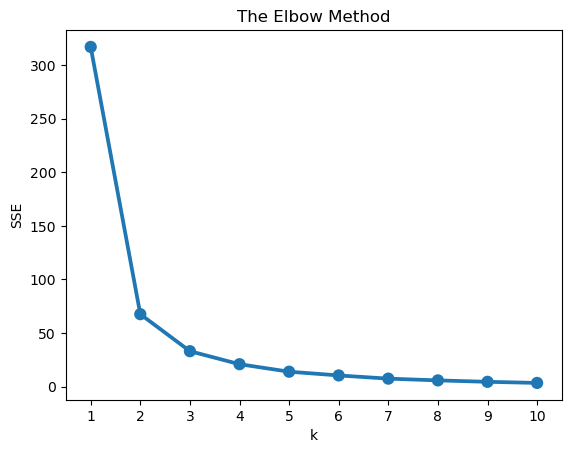

In [33]:
# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_rfm_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

# Plot Elbow Method to find best k
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


I will use 3 as my number of clusters

In [34]:
from sklearn.cluster import KMeans

# Choose the number of clusters based of above elbow
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=1)

# Fit the normalized data
kmeans.fit(data_rfm_normalized)

# Assign the clusters to datamart
data_rfm['K_Cluster'] = kmeans.labels_


In [35]:
# Display the first 5 rows of the RFM table with K_Cluster
print(data_rfm.head())

            Recency  Frequency  Monetary  CustomerID  K_Cluster
CustomerID                                                     
12346.0         317          1  77183.60     12346.0          2
12347.0          31        133   3598.64     12347.0          0
12348.0          67          7    754.00     12348.0          0
12349.0          10         63   1368.75     12349.0          0
12350.0         302         13    255.30     12350.0          2


Let's create a dictonary to rename the clusters 

In [36]:
# Create a mapping from the original cluster labels to the new ones
cluster_name_mapping = {0: 'Lapsed Customers', 1: 'At Risk', 2: 'Best Customers'}

# Map the labels
data_rfm['K_Cluster'] = data_rfm['K_Cluster'].map(cluster_name_mapping)


In [37]:
# Count the number of customers in each cluster
print(data_rfm['K_Cluster'].value_counts())


Lapsed Customers    2820
At Risk              812
Best Customers       631
Name: K_Cluster, dtype: int64


In [38]:
# Calculate average RFM values and size for each cluster
print(data_rfm.groupby('K_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1))


                 Recency Frequency Monetary      
                    mean      mean     mean count
K_Cluster                                        
At Risk            151.5      31.5    669.5   812
Best Customers     287.7      19.5    559.8   631
Lapsed Customers    30.7     127.8   2771.4  2820


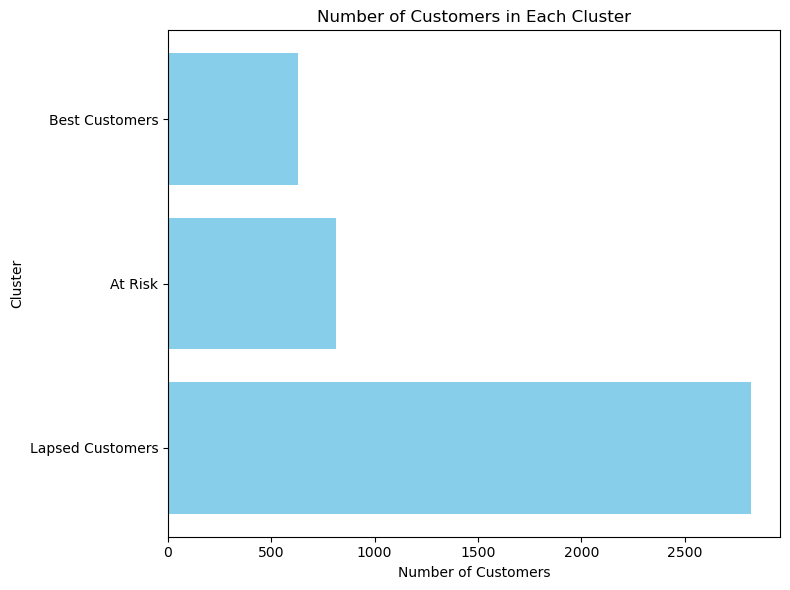

In [39]:
# Assuming you have a DataFrame called 'cluster_data' that contains the cluster labels for each customer
cluster_counts = data_rfm['K_Cluster'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.barh(cluster_counts.index, cluster_counts.values, color='skyblue')  # Using barh for horizontal bars

plt.xlabel('Number of Customers')  # Reversing x-axis label
plt.ylabel('Cluster')  # Reversing y-axis label
plt.title('Number of Customers in Each Cluster')

plt.yticks(cluster_counts.index)  # Ensure all clusters are displayed on the y-axis
plt.tight_layout()  # Improves spacing between plot elements

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Customer Segmentation.png')
plt.savefig(save_path, bbox_inches='tight')

plt.show()


In [40]:
# Define the desired order of clusters
cluster_order = ['Best Customers', 'At Risk', 'Lapsed Users']

# Filter the DataFrame to retrieve the customer(s) with the desired cluster tag(s)
customer_list = data_rfm[data_rfm['K_Cluster'].isin(cluster_order)]

# Sort the customer list by cluster in the desired order
customer_list_sorted = customer_list.sort_values(by=['K_Cluster'], key=lambda x: x.map({k: v for v, k in enumerate(cluster_order)}))

# Export the sorted customer list to a CSV file in the Downloads folder
download_path = "Downloads/customer_list_RMF.csv"  # Modify the path to match your system
customer_list_sorted.to_csv(download_path, index=False)


In [41]:
dataRFM = pd.read_csv('downloads/customer_list_RMF.csv')

In [42]:
dataRFM.head()


,Recency,Frequency,Monetary,CustomerID,K_Cluster
0,317,1,77183.60,12346.0,Best Customers
1,258,18,323.30,14633.0,Best Customers
2,253,1,25.50,17102.0,Best Customers
3,314,8,244.20,17094.0,Best Customers
4,233,132,1052.41,14669.0,Best Customers


In [43]:
dataRFM.tail()

,Recency,Frequency,Monetary,CustomerID,K_Cluster
1438,107,94,1477.89,15002.0,At Risk
1439,139,124,1124.90,15004.0,At Risk
1440,151,12,156.91,15007.0,At Risk
1441,119,13,224.52,15254.0,At Risk
1442,118,5,79.65,18282.0,At Risk


#### Best Customers (High Monetary, High Frequency, Low Recency): 
- These are your most valuable customers. They've made purchases recently, frequently, and they're high spenders.

Action: Aim to keep these customers satisfied and engaged. Send them personalized emails thanking them for their patronage. You could also offer them exclusive deals or access to new products before everyone else. Create a loyalty program to reward them for their continued patronage.

#### At Risk (Medium Monetary, Medium Frequency, Medium Recency): 
- These customers used to shop frequently and spend a decent amount but haven't made a purchase in a while.

Action: You should aim to re-engage these customers as quickly as possible. Send them personalized offers based on their previous purchases, or reminders about items they may have left in their cart. Consider offering them a special discount to entice them to make a purchase.

#### Lapsed Customers (High Recency, Low Frequency, Low Monetary): 
- These are customers who haven't purchased in a long time. They've made few purchases and those purchases were of lower value.

Action: Re-engaging lapsed customers can be difficult and costly. However, you can try sending them surveys to understand why they stopped buying. If they had a bad experience, you could try to rectify it. Offering them a re-engagement discount might also work. But remember, it's often more cost-effective to retain existing customers than to re-engage lapsed ones.

-----

<a id="Geographic-Analysis"></a>
## 4. Geographic Analysis

#### Sales performance by country

In [44]:
# Group the data by 'Country', calculate the sum of 'Revenue' for each country and sort the values in descending order
sales_by_country = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Display the sales performance by country
print(sales_by_country)

Country
United Kingdom          7379406.28
EIRE                     246688.77
Netherlands              233157.89
Germany                  174848.42
France                   162695.86
Australia                122624.01
Spain                     50379.73
Switzerland               46669.57
Japan                     31914.79
Belgium                   29740.93
Norway                    27081.46
Portugal                  25839.60
Sweden                    22709.55
Singapore                 19699.21
Channel Islands           18065.57
Denmark                   16791.90
Finland                   15389.00
Hong Kong                 14536.36
Italy                     13741.95
Cyprus                    12153.38
Austria                    7175.58
Israel                     6996.52
Poland                     6311.31
Unspecified                3930.08
Greece                     3712.99
Iceland                    3598.64
Canada                     2560.20
USA                        2208.63
Malta       

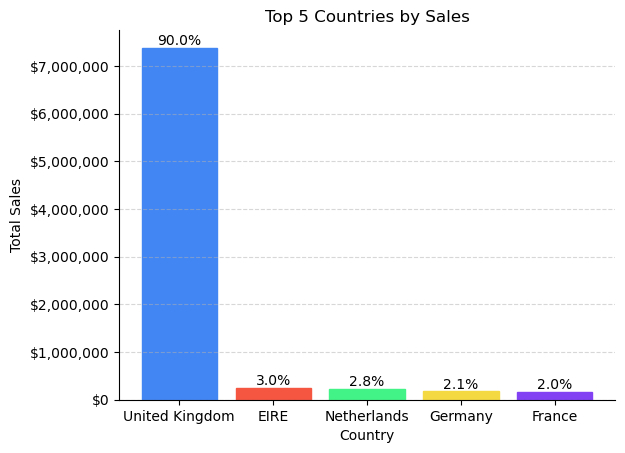

In [45]:
# Group the data by 'Country', calculate the sum of 'Revenue' for each country, and sort the values in descending order
sales_by_country = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Select the top 5 countries
top_5_countries = sales_by_country.head(5)

# Calculate the percentage for each country
total_sales = top_5_countries.sum()
percentages = (top_5_countries / total_sales) * 100

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(top_5_countries.index, top_5_countries)

# Add the percentage labels to the plot
for i, value in enumerate(top_5_countries):
    ax.text(i, value, f'{percentages[i]:.1f}%', ha='center', va='bottom')

# Format the y-axis tick labels as dollar figures with thousands separators
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Set the plot title and labels
ax.set_title('Top 5 Countries by Sales')
ax.set_xlabel('Country')
ax.set_ylabel('Total Sales')

# Set the plot style
plt.style.use('ggplot')

# Customize the colors of the bars
colors = ['#4286f4', '#f45642', '#42f487', '#f4d942', '#8242f4']
for i, bar in enumerate(bars):
    bar.set_color(colors[i])


# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    

# Add grid lines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Top_5_Countries_by_Sales.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


------

<a id="Time-Based-Analysis"></a>
## 5. Time-Based Analysis

#### Determine Peak Shopping Hours and Days

In [46]:
# Extract hour and day of week from 'InvoiceDate'
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek

# Group by 'Hour' and 'DayOfWeek' and sum 'Quantity'
peak_hours_days = data.groupby(['DayOfWeek', 'Hour'])['Quantity'].sum()

# Display the peak shopping hours and days
print(peak_hours_days)


DayOfWeek  Hour
0          7         249
           8       16358
           9       50365
           10      69786
           11      58560
                   ...  
6          12      50370
           13      45470
           14      34729
           15      41811
           16      13240
Name: Quantity, Length: 74, dtype: int64


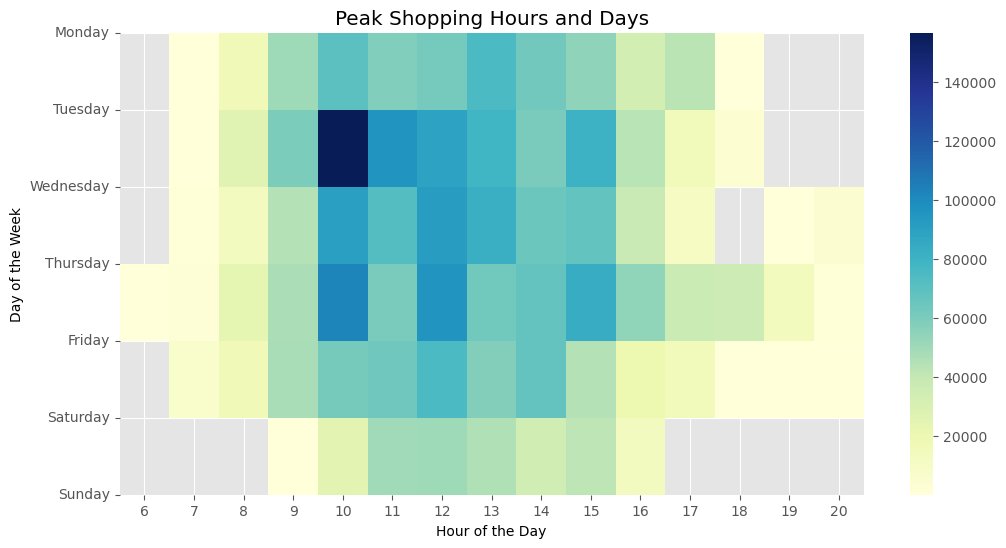

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index of the grouped data to make 'DayOfWeek' and 'Hour' into columns
peak_hours_days = peak_hours_days.reset_index()

# Pivot the data to get 'Hour' as columns, 'DayOfWeek' as rows, and 'Quantity' as values
pivot_df = peak_hours_days.pivot('DayOfWeek', 'Hour', 'Quantity')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='YlGnBu')

plt.title('Peak Shopping Hours and Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Days of the week from 0 to 6 represent Monday to Sunday
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Peak Shopping Times.png')
plt.savefig(save_path, bbox_inches='tight')

plt.show()


#### The heatmap from the peak shopping hours and days analysis can provide a wealth of insights that can guide business decisions. Here are some potential insights and actions you can consider:

#### Identify Peak Shopping Times: 
- Your heatmap can clearly show when your customers are most active on your website.

Action: Use this information to ensure your website is prepared for heavy traffic during these hours. This can improve the online shopping experience and potentially increase conversions.

#### Identify Off-Peak Shopping Times: 
- The heatmap will also show when your website has the least traffic.

Action: Schedule website maintenance or updates during these times to minimize the impact on customers. You might also consider time-specific promotions to encourage more activity during these quieter periods.

#### Promotional Activities and Marketing: 
- Knowing when customers are most likely to be shopping can help inform your promotional activities and email marketing strategy.

Action: Schedule email campaigns, social media posts, or push notifications to go out just before or during these peak times to engage customers while they're most active.

#### Personalization: 
- If you can tie the peak times to specific user demographics (like location), you can offer a personalized user experience.

Action: Personalize the shopping experience by featuring products during peak times that are popular in the customer's location or according to their previous browsing history.

#### Customer Support: 
- If you provide live customer support, such as chat or phone support, peak shopping times can guide staffing decisions.

Action: Ensure that enough customer service representatives are available during peak shopping times to handle inquiries, assist with purchases, and resolve issues promptly.

#### Supply Chain Management: 
- Peaks in online activity can impact your inventory and fulfillment operations.

Action: Coordinate with your supply chain to ensure that popular items remain in stock and that fulfillment operations are prepared to handle an increase in orders during peak times.

#### Sales Forecasting: 
- Patterns of online shopping activity can help predict future sales and website traffic.

Action: Use these patterns to anticipate periods of high demand, allowing you to optimize inventory, staffing, and marketing efforts. You can also use this information to manage server resources and prevent website downtime during peak shopping times.

-----

<a id="Inventory-Analysis"></a>
##  6. Inventory Analysis

In [50]:
# Calculate the turnover rate as total quantity sold divided by the number of unique invoices for each product
data['TurnoverRate'] = data.groupby('StockCode')['Quantity'].transform('sum') / data.groupby('StockCode')['InvoiceNo'].transform('nunique')

In [51]:
# Display the items with the highest turnover rates
print(data[['StockCode', 'TurnoverRate']].drop_duplicates().sort_values(by='TurnoverRate', ascending=False))

       StockCode  TurnoverRate
52771     47556B   1300.000000
61619      23166    334.017167
446973     23378    254.500000
446974     23376    147.000000
138639     22616    144.333333
...          ...           ...
287644     22016      1.000000
124191     90068      1.000000
285702     35650      1.000000
6142      90060F      1.000000
219409    82613a      1.000000

[3547 rows x 2 columns]


In [52]:
# Display the items with the lowest turnover rates
print(data[['StockCode', 'TurnoverRate']].drop_duplicates().sort_values(by='TurnoverRate'))

       StockCode  TurnoverRate
12231     90060D      1.000000
10800      90132      1.000000
10801      90140      1.000000
140940    84743C      1.000000
137681    85049d      1.000000
...          ...           ...
138639     22616    144.333333
446974     23376    147.000000
446973     23378    254.500000
61619      23166    334.017167
52771     47556B   1300.000000

[3547 rows x 2 columns]


In [53]:
# Classify items into 'A', 'B', or 'C' based on the quantile of turnover rate
data['ABC'] = pd.qcut(data['TurnoverRate'], q=[0, 0.2, 0.8, 1], labels=['C', 'B', 'A'])

In [54]:
# Display the classification results
print(data[['StockCode', 'ABC']].drop_duplicates())

       StockCode ABC
0         85123A   A
1          71053   B
2         84406B   B
3         84029G   B
4         84029E   B
...          ...  ..
503602     23562   C
504104     23561   A
507867     23609   C
509369    85179a   C
512588     23617   C

[3547 rows x 2 columns]


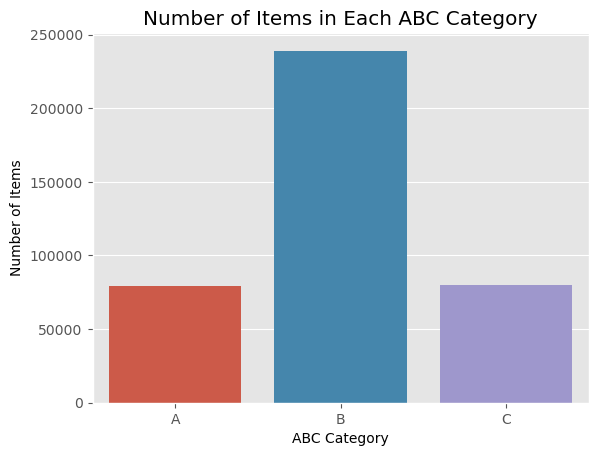

In [55]:
# Plot the number of items in each category
sns.countplot(x='ABC', data=data, order=['A', 'B', 'C'])

plt.xlabel('ABC Category')
plt.ylabel('Number of Items')
plt.title('Number of Items in Each ABC Category')

plt.show()

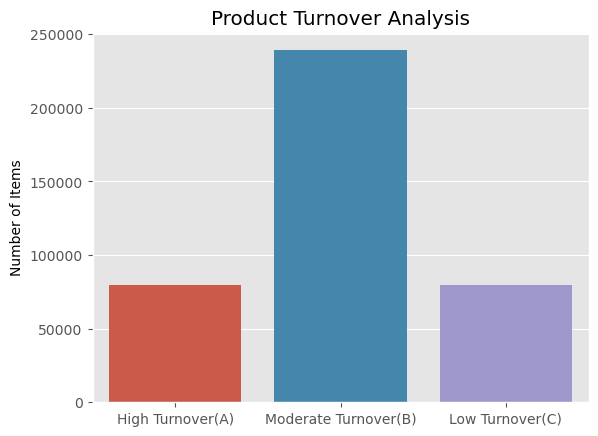

In [56]:
# Relabel the x-axis categories as 'High Turnover', 'Moderate Turnover', and 'Low Turnover'
sns.countplot(x='ABC', data=data, order=['A', 'B', 'C'])
plt.xticks(ticks=[0, 1, 2], labels=['High Turnover(A)', 'Moderate Turnover(B)', 'Low Turnover(C)'])

plt.xlabel('')
plt.ylabel('Number of Items')
plt.title('Product Turnover Analysis')

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Product Turnover Analysis2.png')
plt.savefig(save_path, bbox_inches='tight')

plt.show()


#### The insights derived from inventory analysis can be used to make important business decisions and optimizations.

#### Optimize Stock Levels: 
- Identifying products with high turnover rates can help ensure that popular items remain in stock. At the same time, it can help identify slow-moving or overstocked items. This will help in maintaining an optimal inventory level, reducing carrying costs, and minimizing the risk of stockouts.

Action: Increase order quantities and frequency for high turnover items ('A' items). For slow-moving or overstocked items ('C' items), consider decreasing order quantities, increasing promotion efforts, or even discontinuing the product if it's consistently not performing.

#### Improve Forecasting: 
- The ABC classification can be used to improve sales forecasting. 'A' items are likely to contribute the most to future sales, while 'C' items will contribute the least.

Action: Prioritize 'A' items in sales forecasts. Consider the sales patterns of 'A' items when forecasting overall sales and when making purchasing and restocking decisions with suppliers.

#### Refine Marketing and Promotion: 
- Understanding which items are most popular can also inform marketing and promotional strategies.

Action: Highlight 'A' items in marketing campaigns to attract customers. For 'C' items, consider targeted promotions to clear excess stock and improve turnover rates.

#### Negotiate with Suppliers: 
- Having a clear understanding of your inventory turnover can also aid in negotiations with suppliers.

Action: For 'A' items, negotiate better prices or delivery times due to the high volume of orders. For 'C' items, negotiate smaller order sizes or longer payment terms to reduce carrying costs.

#### Inventory Management Policies: 
- The ABC classification can guide inventory management policies. 'A' items may require tighter control and more frequent review than 'B' or 'C' items.

Action: Implement different inventory management policies for 'A', 'B', and 'C' items. For example, use a continuous review policy for 'A' items and a periodic review policy for 'B' and 'C' items.

-----

<a id="Customer-Retention-Analysis"></a>
## 7. Customer Retention Analysis

### Customer Lifetime Value CLV

Customer Lifetime Value (CLV) is the total worth to a business of a customer over the whole period of their relationship. It's an important metric as it costs less to keep existing customers than it does to acquire new ones, so increasing the value of your existing customers is key.

In [57]:
# Average Purchase Value
avg_purchase = data['Revenue'].sum() / data['InvoiceNo'].nunique()

# Number of Repeat Purchases
purchase_freq = data.groupby('CustomerID')['InvoiceNo'].nunique()
avg_repeat_purchases = purchase_freq.mean() - 1

# Average Customer Lifespan
# Assuming you have only one year of data, let's use 1 year as lifespan
avg_lifespan = 1  # in years

# CLV
clv = avg_purchase * avg_repeat_purchases * avg_lifespan

print('Estimated Customer Lifetime Value (CLV) is: $', round(clv, 2))

Estimated Customer Lifetime Value (CLV) is: $ 1577.05


In [58]:
# Calculate average purchase value per customer
avg_purchase_per_customer = data.groupby('CustomerID')['Revenue'].sum() / data.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate number of repeat purchases per customer
repeat_purchases_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique() - 1

# Assuming you have only one year of data, let's use 1 year as lifespan
lifespan_per_customer = 1  # in years

# CLV per customer
clv_per_customer = avg_purchase_per_customer * repeat_purchases_per_customer * lifespan_per_customer

# Convert to DataFrame for easier manipulation
clv_df = clv_per_customer.reset_index()
clv_df.columns = ['CustomerID', 'CLV']

# First, remove the customers with zero CLV
clv_df = clv_df[clv_df['CLV'] > 0]

# If you still have customers with identical CLV, 
# it's better to use cut function instead of qcut

# Define bin edges
bin_edges = [clv_df['CLV'].min(), clv_df['CLV'].quantile(0.25), clv_df['CLV'].quantile(0.75), clv_df['CLV'].max()]

# Define labels
labels=['Low', 'Medium', 'High']

# Use cut function to create segments
clv_df['CLV_Segment'] = pd.cut(clv_df['CLV'], bins=bin_edges, labels=labels, include_lowest=True)

clv_df.head()


,CustomerID,CLV,CLV_Segment
1,12347.0,2998.866667,High
2,12348.0,502.666667,Medium
5,12352.0,1920.660000,High
9,12356.0,1389.440000,Medium
12,12359.0,4649.565000,High


In [66]:
# Count the number of customers in each segment
segment_counts = clv_df['CLV_Segment'].value_counts()

# Convert the series to a DataFrame and reset the index
segment_counts_df = segment_counts.reset_index()

# Rename the columns for clarity
segment_counts_df.columns = ['CLV_Segment', 'Number_of_Customers']

In [67]:
# Print the DataFrame
print(segment_counts_df)

  CLV_Segment  Number_of_Customers
0      Medium                 1358
1         Low                  679
2        High                  679


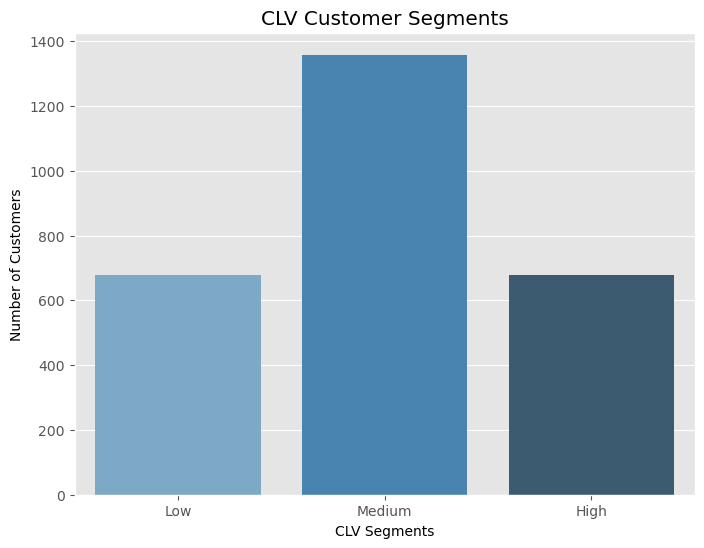

<Figure size 640x480 with 0 Axes>

In [68]:
# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Blues_d")
plt.title('CLV Customer Segments')
plt.xlabel('CLV Segments')
plt.ylabel('Number of Customers')
plt.show()

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'CLV Customer Segments.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)


Our Customer Lifetime Value (CLV) analysis segmented our customer base into three groups: Low, Medium, and High CLV. The majority of our customers, totaling 1,358, fall into the Medium CLV category, regularly contributing to our revenue. However, we also have an equal distribution of Low and High CLV customers, each with 679 individuals.

Low CLV customers are those who provide less revenue, perhaps due to infrequent buying or lower spending. Conversely, High CLV customers significantly contribute to our business due to regular, high-value purchases.

This data gives us an opportunity to devise specific marketing strategies. For Medium CLV customers, we can focus on upselling and cross-selling. Retention efforts should be increased for High CLV customers to maintain their loyalty. For Low CLV customers, we need to explore strategies to enhance their purchase frequency or spend.


In [69]:
# Calculate average CLV of each segment
avg_clv_segment = clv_df.groupby('CLV_Segment')['CLV'].mean()

# Convert the series to a DataFrame and reset the index
avg_clv_df = avg_clv_segment.reset_index()

# Rename the columns for clarity
avg_clv_df.columns = ['CLV_Segment', 'Average_CLV']

In [70]:
# Print the DataFrame
print(avg_clv_df)

  CLV_Segment  Average_CLV
0         Low   180.271657
1      Medium   782.260473
2        High  8869.251070


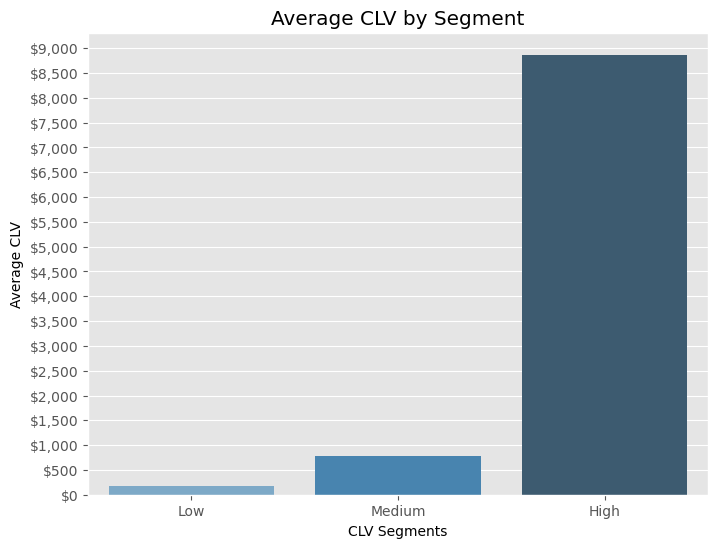

In [71]:
# Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=avg_clv_segment.index, y=avg_clv_segment.values, palette="Blues_d")
plt.title('Average CLV by Segment')
plt.xlabel('CLV Segments')
plt.ylabel('Average CLV')

# Format y-axis as dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Set y-ticks
min_val = 0  # start at $0
max_val = int(avg_clv_segment.max()) + 500  # go a bit over the max value
ax.set_yticks(np.arange(min_val, max_val, step=500))  # Set the step size to $500

# Save figure to file in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'Average CLV by Segment.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


Customers in the Low CLV segment contribute an average of approximately $180 to our revenue over their expected lifetime. These customers may be occasional shoppers or those who spend less per transaction. They represent a potential area for growth, as strategies to increase their purchase frequency or transaction size could significantly impact our total revenue.

The Medium CLV segment comprises customers who, on average, contribute about $782 over their expected lifetime. These customers provide a reliable source of income and may be regular shoppers or those who spend a moderate amount per transaction. Strategies like cross-selling and upselling might be effective to enhance their contribution to the business.

The customers in the High CLV segment are the most valuable to our business. With an average CLV of approximately $8,869, these customers likely make frequent purchases or spend substantial amounts per transaction. They are crucial to our business's overall revenue and profitability. Retention strategies, such as loyalty programs and personalized marketing, could be instrumental in maintaining their high level of engagement and ensuring their continued patronage.

In conclusion, understanding these segments can help us refine our marketing and customer engagement strategies to maximize the overall Customer Lifetime Value.

<a id="MBA"></a>
## Market Basket Analysis MBA

#### Market basket analysis is a type of analysis often used in retail to understand the purchase behavior of customers. It's based on the concept that if you buy a certain group of items, you are more (or less) likely to buy another group of items.

In [ ]:
# Reload the Data
data = pd.read_csv('Downloads/online_retail.csv')
data.head()

### Data Cleaning

When preforming a Market Basket Analysis it's common practice to strip extra space from `Description`, as well as standardizing text to lower case and remove special characters. 

In [ ]:
# Stripping extra spaces from the description
data['Description'] = data['Description'].str.strip()
  
# Convert to lower case
data['Description'] = data['Description'].str.lower()

#Remove special characters
data['Description'] = data['Description'].str.replace('[^\w\s]', '')

In [ ]:
# drop rows with negative values in Quantity and UnitPrice columns
data = data.drop(data[data['Quantity'] < 0].index)
data = data.drop(data[data['UnitPrice'] < 1].index)
# We're going to remove any item priced less than $1 ($0-$.99 removed)

In [ ]:
# drop all rows that contain missing values
data.dropna(inplace=True)

In [ ]:
# Filter out rows containing 'postage' or 'dotcom postage' in the description
data = data[~data['Description'].str.contains('POSTAGE|DOTCOM POSTAGE', case=False)]

### We'll only EIRE sales

I wanted to use UK sales, but the data is too big to process on my machine.

In [ ]:
basket_EIRE = (data[data['Country'] =="EIRE"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
# Show a subset of columns
print(basket_EIRE.head())

We now need to consolidate the items into 1 transaction per row with each product 1 hot encoded.

### One-Hot encode our dataset


One-hot encoding is a process of converting categorical data to a format that could be provided to machine learning algorithms to improve predictions. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [ ]:
# Any positive quantity is converted to 1 and anything less than 0 is set to 0.
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

basket_encoded = basket_EIRE.applymap(hot_encode) 
basket_EIRE = basket_encoded

### Bulding the models and analyzing the results

In [ ]:
# Building the model
frq_items = apriori(basket_EIRE, min_support = 0.05, use_colnames = True)

In [ ]:
# Collecting the rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [ ]:
print(rules.head())

Above is a list of rules with corresponding support, confidence and lift for each rule. The rules are sorted by decreasing confidence and lift.

These rules can then be used to make predictions about future customer behavior and can inform strategies for up-selling, cross-selling, or even stock reordering. For instance, if we find a rule that suggests customers often buy "White Hanging Heart T-Light Holder" and "White Metal Lantern" together, we might want to place these items close together in the store or bundle them in promotions.

In [ ]:
# Exporting the results to a CSV file
filename = 'market_basket_analysis_results.csv'

# Create the path
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', filename)

# Save the results to a CSV file
rules.to_csv(save_path, index=False)

I exported the results to a CSV as this information can be very useful for the web development team, who can leverage these insights to implement features on a website that enhance cross-selling and upselling.

In [ ]:
# Let's see what the file looks like
MBA = pd.read_csv('Downloads/market_basket_analysis_results.csv')
MBA.head(20)

### Here are the explanations for each column:

#### Antecedents: 
- These are the items that a customer has already put in their "basket". For example, if a customer has selected the 'GREEN REGENCY TEACUP AND SAUCER', 'REGENCY SUGAR BOWL GREEN', etc., these items are the antecedents.

#### Consequents: 
- These are the items that the customer is likely to add to their "basket". For instance, if the antecedents include 'GREEN REGENCY TEACUP AND SAUCER', the consequent might be 'ROSES REGENCY TEACUP AND SAUCER'. This means that customers who buy the 'GREEN REGENCY TEACUP AND SAUCER' are likely to also buy the 'ROSES REGENCY TEACUP AND SAUCER'.

#### Antecedent support: 
- This is the proportion of transactions that include the antecedent item(s). For example, a 0.069444 antecedent support for 'GREEN REGENCY TEACUP AND SAUCER' means that about 6.94% of all transactions included this item.

#### Consequent support: 
- Similar to antecedent support, this is the proportion of transactions that include the consequent item(s).

#### Support: 
- This is the proportion of transactions that include both the antecedent and the consequent. A high support means that the antecedent and consequent occur together more frequently.

#### Confidence: 
- This is the probability that a transaction includes the consequent, given that it includes the antecedent. A confidence of 1 means that every time the antecedent items are bought, the consequent is also bought.

#### Lift: 
- This measures how much more likely the consequent is purchased when the antecedent is purchased, while controlling for how popular the consequent is. A lift greater than 1 indicates that the antecedent and consequent are more likely to be bought together than would be expected if they were independently purchased.

#### Leverage: 
- This measures the difference between the observed frequency of the antecedent and the consequent appearing together and what would be expected if they were independent. An itemset has a leverage of 0 indicates independence.

#### Conviction: 
- This is a measure of the dependency of the consequent on the antecedent. A high conviction means that the consequent is highly depending on the antecedent. For instance, if the conviction is 'inf', it means the consequent is always purchased when the antecedents are purchased.

#### Zhang's Metric: 
- This is another measure of the rule interestingness that captures both the direction and the strength of the rule. It ranges from -1 to +1, with +1 indicating a strong positive association between the antecedent and consequent, -1 a strong negative association, and 0 no association.

#### Using this table, we can design strategies to increase sales. For example, we can use these rules for cross-selling, up-selling, and for personalized advertising.

----

<a id="Conclusion"></a>
## Conclusion

This project successfully analyzed key retail metrics to drive online retail strategy. My insights identified top-selling products and high-value customers, enabling targeted marketing and retention strategies. This, coupled with dynamic pricing and inventory management strategies, is expected to optimize profitability and revenue.

However, our Customer Lifetime Value analysis was a simplified version without profit margins, due to lack of product cost data; future datasets should include this for enhanced precision.

Geographic and time-based analyses informed logistics and promotional strategies, while our RFM and cost-volume-profit analysis further provided insights into customer behavior.

In summary, this project has laid a strong foundation for data-driven decision making, aiming to increase revenue, customer loyalty, and optimized inventory management. The derived insights will serve as a guide for refining the retail strategy and future growth.
